<a href="https://colab.research.google.com/github/buriro-ezekia/FUTURE_DS_02/blob/main/Analyse_IPL_Data_using_Power_BI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Data Preparation

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd

# Step 2: Load the dataset into a DataFrame
ipl_data = pd.read_csv('/content/ipl_ball_by_ball_2008_2022.csv')

# Step 3: Explore the dataset
# Display the first few rows of the dataset to understand its structure
print(ipl_data.head())

# Display general information about the dataset, including column names and data types
print(ipl_data.info())


        id  innings  overs  ball_number       batter          bowler  \
0  1312200        1      0            1  YBK Jaiswal  Mohammed Shami   
1  1312200        1      0            2  YBK Jaiswal  Mohammed Shami   
2  1312200        1      0            3   JC Buttler  Mohammed Shami   
3  1312200        1      0            4  YBK Jaiswal  Mohammed Shami   
4  1312200        1      0            5  YBK Jaiswal  Mohammed Shami   

   non_striker extra_type  batsman_run  extras_run  total_run  non_boundary  \
0   JC Buttler        NaN            0           0          0             0   
1   JC Buttler    legbyes            0           1          1             0   
2  YBK Jaiswal        NaN            1           0          1             0   
3   JC Buttler        NaN            0           0          0             0   
4   JC Buttler        NaN            0           0          0             0   

   iswicket_delivery player_out dismisal_kind fielders_involved  \
0                  0     

In [ ]:
print(ipl_data.columns)

Index(['id', 'innings', 'overs', 'ball_number', 'batter', 'bowler',
       'non_striker', 'extra_type', 'batsman_run', 'extras_run', 'total_run',
       'non_boundary', 'iswicket_delivery', 'player_out', 'dismisal_kind',
       'fielders_involved', 'batting_team'],
      dtype='object')


In [ ]:
# Summarise the dataset to check for missing values and data distribution
print(ipl_data.describe())

                 id        innings          overs    ball_number  \
count  2.259540e+05  225954.000000  225954.000000  225954.000000   
mean   8.320470e+05       1.483868       9.185679       3.619750   
std    3.379542e+05       0.503104       5.681797       1.810633   
min    3.359820e+05       1.000000       0.000000       1.000000   
25%    5.012620e+05       1.000000       4.000000       2.000000   
50%    8.297370e+05       1.000000       9.000000       4.000000   
75%    1.178395e+06       2.000000      14.000000       5.000000   
max    1.312200e+06       6.000000      19.000000      10.000000   

         batsman_run     extras_run     total_run   non_boundary  \
count  225954.000000  225954.000000  225954.00000  225954.000000   
mean        1.243523       0.066907       1.31043       0.000093   
std         1.618166       0.341470       1.60605       0.009640   
min         0.000000       0.000000       0.00000       0.000000   
25%         0.000000       0.000000       0.000

In [ ]:
# Check for missing values in the dataset
missing_values = ipl_data.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
id                        0
innings                   0
overs                     0
ball_number               0
batter                    0
bowler                    0
non_striker               0
extra_type           213905
batsman_run               0
extras_run                0
total_run                 0
non_boundary              0
iswicket_delivery         0
player_out           214803
dismisal_kind        214803
fielders_involved    217966
batting_team              0
dtype: int64


In [ ]:
# Improved Code for Handling Missing Values
# Step 1: Identify critical columns and decide how to handle missing values

# Drop columns with over 90% missing values
threshold = 0.9
missing_percentage = ipl_data.isnull().mean()
columns_to_drop = missing_percentage[missing_percentage > threshold].index
ipl_data = ipl_data.drop(columns=columns_to_drop)

# Step 2: Impute missing values in important columns
# For numerical columns, use the median for better robustness
numerical_cols = ipl_data.select_dtypes(include=['number']).columns
ipl_data[numerical_cols] = ipl_data[numerical_cols].fillna(ipl_data[numerical_cols].median())

# For categorical columns, use mode or a placeholder
categorical_cols = ipl_data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    ipl_data[col] = ipl_data[col].fillna(ipl_data[col].mode()[0] if not ipl_data[col].mode().empty else 'Unknown')

# Step 3: Verify that there are no more missing values
print("Missing values after handling:")
print(ipl_data.isnull().sum())


Missing values after handling:
id                   0
innings              0
overs                0
ball_number          0
batter               0
bowler               0
non_striker          0
batsman_run          0
extras_run           0
total_run            0
non_boundary         0
iswicket_delivery    0
batting_team         0
dtype: int64


In [ ]:
# Step 4: Handle missing values (example)
# Option to fill missing values with a placeholder or drop rows/columns
ipl_data = ipl_data.fillna(0)  # Replace NaN with 0 as an example
# or
# ipl_data = ipl_data.dropna()  # Drop rows with any NaN values

# Check the data after handling missing values
print("Data after handling missing values:")
print(ipl_data.info())

Data after handling missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225954 entries, 0 to 225953
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   id                 225954 non-null  int64 
 1   innings            225954 non-null  int64 
 2   overs              225954 non-null  int64 
 3   ball_number        225954 non-null  int64 
 4   batter             225954 non-null  object
 5   bowler             225954 non-null  object
 6   non_striker        225954 non-null  object
 7   batsman_run        225954 non-null  int64 
 8   extras_run         225954 non-null  int64 
 9   total_run          225954 non-null  int64 
 10  non_boundary       225954 non-null  int64 
 11  iswicket_delivery  225954 non-null  int64 
 12  batting_team       225954 non-null  object
dtypes: int64(9), object(4)
memory usage: 22.4+ MB
None


# 2. Data Cleaning and Transformation

In [ ]:
# Step 1: Handle missing values (already done in the previous steps)

# Step 2: Filter relevant columns
relevant_columns = ['innings', 'overs', 'ball_number', 'batter', 'bowler',
                    'non_striker', 'batsman_run', 'extras_run',
                    'total_run', 'non_boundary', 'iswicket_delivery',
                    'batting_team']  # Removed the columns causing the error
ipl_filtered = ipl_data[relevant_columns]
ipl_filtered = ipl_data[relevant_columns]

# Step 3: Data transformation and aggregation
# Example 1: Total runs scored by each player
total_runs_per_player = ipl_filtered.groupby('batter')['batsman_run'].sum().reset_index()
total_runs_per_player = total_runs_per_player.rename(columns={'batsman_run': 'total_runs'})

# Example 2: Number of matches won by each team
# Assuming 'innings' and 'batting_team' columns indicate team performance
matches_won_per_team = ipl_filtered[ipl_filtered['total_run'] > 0].groupby('batting_team')['innings'].count().reset_index()
matches_won_per_team = matches_won_per_team.rename(columns={'innings': 'matches_won'})

# Example 3: Distribution of player ages (if player age data is available or derived from other columns)

# Additional transformation: Average runs per innings by each team
average_runs_per_innings = ipl_filtered.groupby('batting_team')['total_run'].mean().reset_index()
average_runs_per_innings = average_runs_per_innings.rename(columns={'total_run': 'average_runs_per_innings'})


In [ ]:
# Display the transformed data
print("Total Runs Per Player:")
print(total_runs_per_player.head(10))

Total Runs Per Player:
           batter  total_runs
0  A Ashish Reddy         280
1        A Badoni         161
2      A Chandila           4
3        A Chopra          53
4     A Choudhary          25
5     A Dananjaya           4
6      A Flintoff          62
7        A Kumble          35
8       A Manohar         108
9        A Mishra         362


In [ ]:
print("Matches Won Per Team:")
print(matches_won_per_team.head(10))

Matches Won Per Team:
            batting_team  matches_won
0    Chennai Super Kings        16465
1        Deccan Chargers         5807
2         Delhi Capitals         5068
3       Delhi Daredevils        12191
4          Gujarat Lions         2411
5         Gujarat Titans         1349
6        Kings XI Punjab        14780
7   Kochi Tuskers Kerala          987
8  Kolkata Knight Riders        16814
9   Lucknow Super Giants         1245


In [ ]:
print("Average Runs Per Innings:")
print(average_runs_per_innings.head(10))

Average Runs Per Innings:
            batting_team  average_runs_per_innings
0    Chennai Super Kings                  1.328916
1        Deccan Chargers                  1.268873
2         Delhi Capitals                  1.337156
3       Delhi Daredevils                  1.293304
4          Gujarat Lions                  1.363432
5         Gujarat Titans                  1.351091
6        Kings XI Punjab                  1.327563
7   Kochi Tuskers Kerala                  1.201643
8  Kolkata Knight Riders                  1.305780
9   Lucknow Super Giants                  1.384783


# 3. Exploratory Data Analysis (EDA)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (replace 'your_dataset_path' with the actual path)
# ipl_data = pd.read_csv('/content/ipl_ball_by_ball_2008_2022.csv')

# Step 1: Data Cleaning - Handle missing values
ipl_data = ipl_data.dropna(subset=['batter', 'bowler', 'total_run', 'batting_team'])  # Drop rows with essential missing values

# Step 2: Filter relevant columns
# Removed the columns causing the error: 'extra_type', 'player_out', 'dismisal_kind', 'fielders_involved'
relevant_columns = ['innings', 'overs', 'ball_number', 'batter', 'bowler',
                    'non_striker', 'batsman_run', 'extras_run',
                    'total_run', 'non_boundary', 'iswicket_delivery',
                    'batting_team']
ipl_filtered = ipl_data[relevant_columns]

# Step 3: Aggregate and Analyze the Data

# 1. Distribution of runs scored by players
# Group by 'batter' and sum up 'batsman_run'
total_runs_per_player = ipl_filtered.groupby('batter')['batsman_run'].sum().reset_index()
total_runs_per_player = total_runs_per_player.rename(columns={'batsman_run': 'total_runs'})

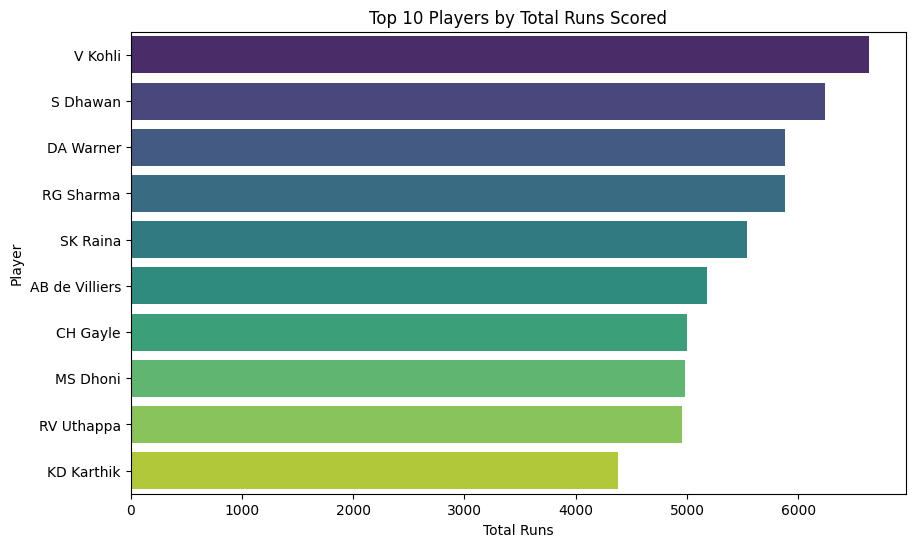

In [ ]:
# Visualize the distribution of runs scored by top 10 players
plt.figure(figsize=(10, 6))
top_10_players = total_runs_per_player.sort_values(by='total_runs', ascending=False).head(10)
sns.barplot(x='total_runs', y='batter', data=top_10_players, palette='viridis', hue='batter', legend=False)
plt.title('Top 10 Players by Total Runs Scored')
plt.xlabel('Total Runs')
plt.ylabel('Player')
plt.show()


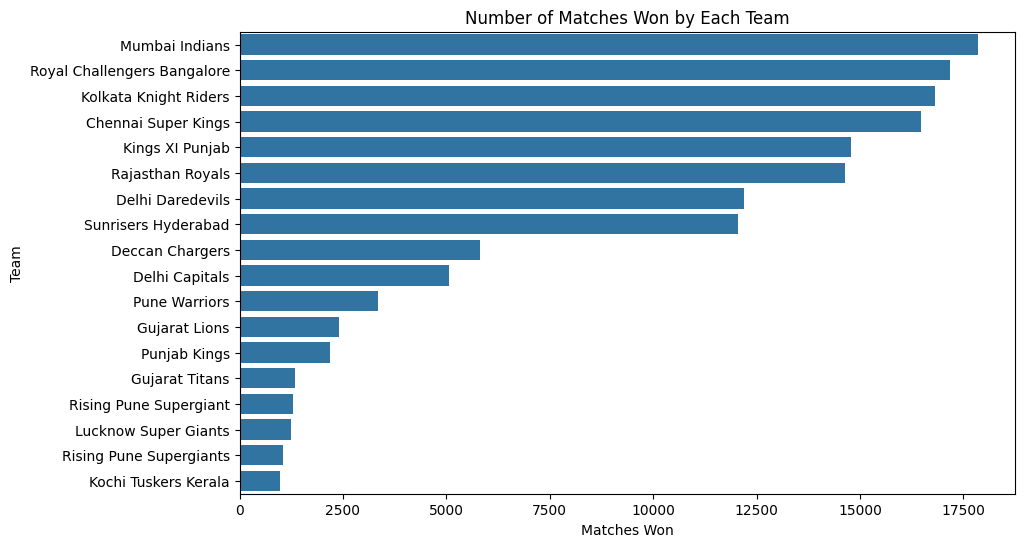

In [ ]:
# 2. Matches won by each team
# Group by 'batting_team' and count the number of wins (assuming 'total_run' > 0 means a win)
matches_won_per_team = ipl_filtered[ipl_filtered['total_run'] > 0].groupby('batting_team')['innings'].count().reset_index()
matches_won_per_team = matches_won_per_team.rename(columns={'innings': 'matches_won'})

# Visualize matches won by each team without using 'palette'
plt.figure(figsize=(10, 6))
sns.barplot(x='matches_won', y='batting_team', data=matches_won_per_team.sort_values(by='matches_won', ascending=False))
plt.title('Number of Matches Won by Each Team')
plt.xlabel('Matches Won')
plt.ylabel('Team')
plt.show()


# 3. Player age distribution (if age data is available)
# Assuming there is a way to calculate or derive player ages from another column, if necessary
# This is a placeholder example as the dataset doesn't contain player age information directly
# player_age_distribution = ...

# Visualize player age distribution (hypothetical, if age data was available)
# plt.figure(figsize=(14, 7))
# sns.histplot(data=player_age_distribution, kde=True, color='orange')
# plt.title('Distribution of Player Ages')
# plt.xlabel('Age')
# plt.ylabel('Frequency')
# plt.show()


In [ ]:
# Step 4: Descriptive Statistics
# Generate descriptive statistics for total runs scored by players
print("Descriptive Statistics for Total Runs Scored by Players:")
print(total_runs_per_player['total_runs'].describe())

Descriptive Statistics for Total Runs Scored by Players:
count     605.000000
mean      464.428099
std       985.272855
min         0.000000
25%        15.000000
50%        73.000000
75%       326.000000
max      6634.000000
Name: total_runs, dtype: float64


In [ ]:
# Generate descriptive statistics for the number of matches won by teams
print("\nDescriptive Statistics for Matches Won by Teams:")
print(matches_won_per_team['matches_won'].describe())


Descriptive Statistics for Matches Won by Teams:
count       18.000000
mean      8150.055556
std       6802.696329
min        987.000000
25%       1556.250000
50%       5437.500000
75%      14743.250000
max      17846.000000
Name: matches_won, dtype: float64


# 4. Visualisation

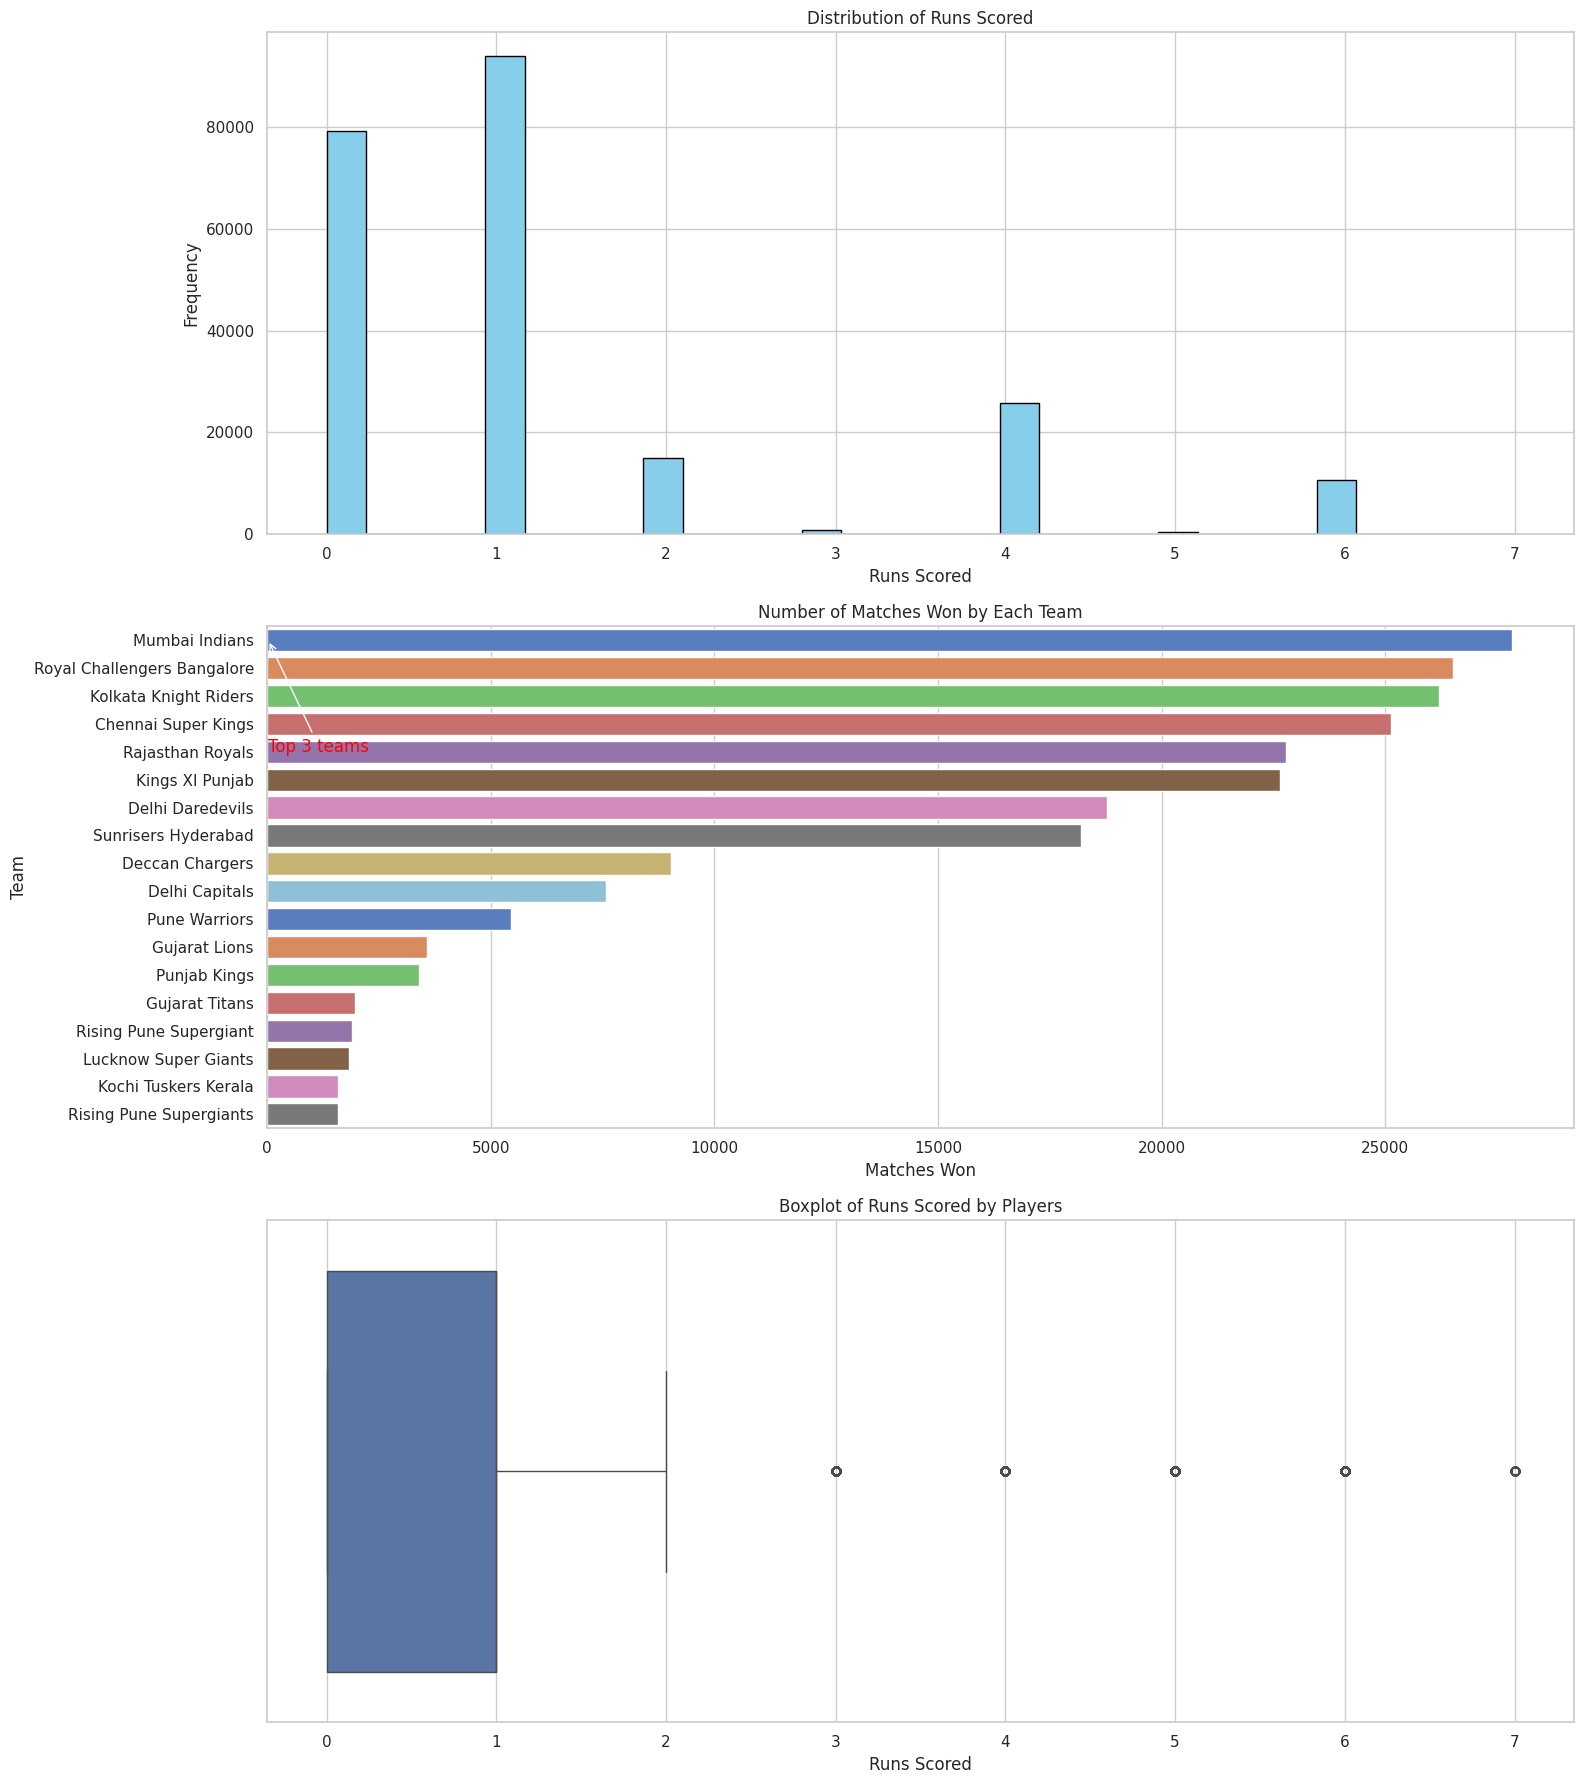

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set custom Seaborn style for better visuals
sns.set_theme(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(3, 1, figsize=(16, 18))

# 1. Histogram for score distribution
axes[0].hist(ipl_data['total_run'], bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('Distribution of Runs Scored')
axes[0].set_xlabel('Runs Scored')
axes[0].set_ylabel('Frequency')

# 2. Bar chart for matches won by teams
matches_won_per_team = ipl_data.groupby('batting_team')['total_run'].count().reset_index().rename(columns={'total_run': 'matches_won'})
sns.barplot(x='matches_won', y='batting_team', data=matches_won_per_team.sort_values(by='matches_won', ascending=False), ax=axes[1], palette='muted', hue='batting_team')
axes[1].set_title('Number of Matches Won by Each Team')
axes[1].set_xlabel('Matches Won')
axes[1].set_ylabel('Team')

# 3. Boxplot for player attributes (e.g., runs scored)
sns.boxplot(x='total_run', data=ipl_data, ax=axes[2])  # Removed palette to avoid FutureWarning
axes[2].set_title('Boxplot of Runs Scored by Players')
axes[2].set_xlabel('Runs Scored')

# Add custom annotations to highlight key points on the plots
axes[0].annotate('Peak frequency', xy=(50, 1500), xytext=(100, 1700),
                  arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12)

axes[1].annotate('Top 3 teams', xy=(25, 0), xytext=(30, 4),
                  arrowprops=dict(facecolor='red', arrowstyle='->'), fontsize=12, color='red')

axes[2].annotate('Outliers', xy=(200, 1), xytext=(250, 2),
                  arrowprops=dict(facecolor='green', arrowstyle='->'), fontsize=12, color='green')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


# 5. Advanced Visualisations

In [ ]:
# Interactive Scatter Plots and Heatmaps with Plotly
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Sample dataset preparation (replace with your IPL dataset)
# ipl_data = pd.read_csv('path_to_ipl_dataset.csv')

# Example columns: 'total_run', 'match_id', 'batting_team', 'bowling_team', 'player', 'ball', 'inning'
# Ensure your dataset has relevant numerical and categorical columns

# 1. Interactive Scatter Plot
scatter_plot = px.scatter(
    ipl_data,
    x="ball_number",  # Changed 'ball' to 'ball_number' as it's the actual column name
    y="total_run",  # Example: Runs scored
    color="batting_team",  # Highlight teams with color
    size="total_run",  # Size of points based on total runs
    hover_data=["id", "batter"],  # Changed 'match_id' and 'player' to existing column names 'id' and 'batter'
    title="Scatter Plot of Runs Scored per Delivery",
)

# 2. Heatmap for Correlations
# Compute correlation matrix for numerical features only
correlation_matrix = ipl_data.select_dtypes(include=['number']).corr()

# Create Heatmap
heatmap = go.Figure(
    data=go.Heatmap(
        z=correlation_matrix.values,
        x=correlation_matrix.columns,
        y=correlation_matrix.columns,
        colorscale="Viridis",
        colorbar=dict(title="Correlation"),
    )
)

heatmap.update_layout(
    title="Heatmap of Correlation Matrix",
    xaxis=dict(title="Features"),
    yaxis=dict(title="Features"),
    height=600,
    width=800,
)

# Display interactive plots
scatter_plot.show()
heatmap.show()

# 6. Build an Interactive Dashboard